# Telco Data
Preparacion del ambiente general incluido el dataset. 


*Como es una etapa exploratoria para evitar compartirlo siempre meidante el drive, se publico el dataset en github para hacer mas facil su importacion.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as snb
#import plotly


# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Diplomatura/TP/telco_churn.train.csv", encoding='latin-1', sep=';')
dataset_link = "https://raw.githubusercontent.com/nuxion/data_eda/main/telco_churn.train.csv"

df = pd.read_csv(dataset_link, encoding='UTF-8', sep=';')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Columna1
0,7644-OMVMY,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,"19,85",NaN,No,NaN
1,1371-DWPAZ,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),"56,05",NaN,No,NaN
2,2520-SGTTA,Female,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,"20,00",NaN,No,NaN
3,4367-NUYAO,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,"25,75",NaN,No,NaN
4,2923-ARZLG,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,"19,70",NaN,No,NaN


**Variables**

![img](https://raw.githubusercontent.com/nuxion/data_eda/main/variables.png) 

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  control           7043 non-null   object 
 11  OnlineBackup      7044 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7042 non-null   object 


In [3]:
df.isna().sum()

customerID             1
gender                 1
SeniorCitizen          1
Partner                1
Dependents             1
tenure                 1
PhoneService           1
MultipleLines          1
InternetService        1
OnlineSecurity         1
control                1
OnlineBackup           0
DeviceProtection       1
TechSupport            1
StreamingTV            1
StreamingMovies        1
Contract               2
PaperlessBilling       1
PaymentMethod          7
MonthlyCharges         0
TotalCharges          12
Churn                  1
Columna1            7043
dtype: int64

## Etapa de limpieza del dataset

De un primera iteracion se observa:
1. Columnas que no corresponden con lo esperado del dataset
2. Datos numericos que pandas los reconocio como objects
3. Valores nulos en varias columnas.
4. Varias columnas pueden ser definidas como categorias y se agrupan algunas de ellas



1. Elimino columnas

In [4]:
df["control"].unique()

array([' ', '0', nan, '..'], dtype=object)

In [5]:
df.drop(["control", "Columna1"], axis=1, inplace=True) # puedo borrar las columnas, no tienen información relevante

2. Como falla la conversion a float porque se encuentran distintos tipos de datos se arma una funcion custom que ante la imposibilidad de **no poder convertir** algunos de los valores estable al dato un `numpy.NaN` value.

In [6]:
def to_float(x):
  """
  Convierte de string a numpy.single type que seria equivalente 
  al float en python, pero como hay valores Nan (por eso el try except)
  utilizo numpy para poder setear el tipo np.Nan cuando no pueda convertirlo
  Posible valores esperados:

  " 61,90 "
  Resultado:
  61.90
  """
  try:
    if isinstance(x, float):
      val = x
    else:
      val = float(x.strip().replace(',', '.'))
  except ValueError:
    val = np.NaN
  return np.single(val)

# Selecciono un con un conjunto reducido para probar
data = df["MonthlyCharges"].iloc[0:5]
print(type(data[0]))
print(data[0])

# Verifico que funcione
for x in data: 
  assert isinstance(to_float(x), np.single)


<class 'str'>
 19,85


In [7]:
df["MonthlyCharges"] = df.apply(lambda x: to_float(x["MonthlyCharges"]), axis=1)
df["TotalCharges"] = df.apply(lambda x: to_float(x["TotalCharges"]), axis=1)

In [8]:
df.isna().sum() # tomar una decision respecto a los valores nulos

customerID           1
gender               1
SeniorCitizen        1
Partner              1
Dependents           1
tenure               1
PhoneService         1
MultipleLines        1
InternetService      1
OnlineSecurity       1
OnlineBackup         0
DeviceProtection     1
TechSupport          1
StreamingTV          1
StreamingMovies      1
Contract             2
PaperlessBilling     1
PaymentMethod        7
MonthlyCharges       1
TotalCharges        12
Churn                1
dtype: int64

PRIMERO HABRIA QUE LIMPIAR LOS VALORES NULOS (hay una fila con todos nan y despues definir lo que queda en las columnas restantes)

In [9]:
df[df.isnull().any(1)] # me dice que filas tienen valores nulos. vemos que la fila 5 es el problema, se puede borrar sin problema

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7644-OMVMY,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,NaN,No
1,1371-DWPAZ,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
2,2520-SGTTA,Female,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,NaN,No
3,4367-NUYAO,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No
4,2923-ARZLG,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700001,NaN,No
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5709-LVOEQ,Female,0.0,Yes,Yes,0.0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
7,3213-VVOLG,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,NaN,No
8,4075-WKNIU,Female,0.0,Yes,Yes,0.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.349998,NaN,No
9,4472-LVYGI,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No


In [10]:
df.drop(5, inplace= True) #elimino la fila 5

In [11]:
df= df.reset_index() # reinicio el índice y borro el anterior que se generó
df.drop("index", axis= 1, inplace= True) 

In [12]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             1
PaperlessBilling     0
PaymentMethod        6
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df["Contract"].unique() #se puede borrar el valor nulo restante

array(['Two year', 'One year', 'Month-to-month', nan], dtype=object)

In [14]:
df["PaymentMethod"].isna().sum()

6

In [15]:
prop_faltantes_mp= (df["PaymentMethod"].isna().sum()/len(df["PaymentMethod"]))*100
print(prop_faltantes_mp) #se ve que proporcionalmente es irrelevante, se pueden borrar los datos faltantes 

0.08519096975720573


In [16]:
df["TotalCharges"].isna().sum() # me pregunto que hay dentro de la variable

11

<AxesSubplot:xlabel='TotalCharges'>

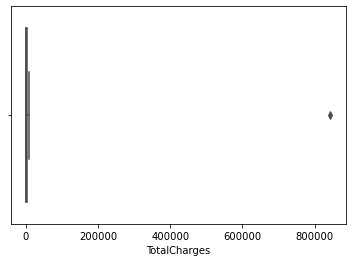

In [17]:
snb.boxplot(x="TotalCharges" , data=df , palette="Set1",orient="h")

In [18]:
df= df.drop(df[df["TotalCharges"] > 600000].index) # filtro el valor maximo para que me quede mejor el boxplot

<AxesSubplot:xlabel='TotalCharges'>

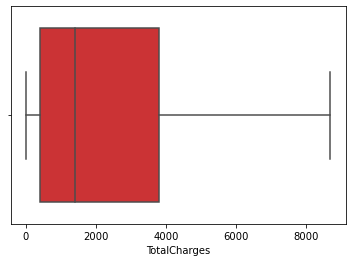

In [19]:
snb.boxplot(x="TotalCharges", data=df , palette="Set1",orient="h") # quizas se puede o borrar los datos nulos o reemplazar por la media o mediana

In [20]:
prop_faltantes_TC= (df["TotalCharges"].isna().sum()/len(df["TotalCharges"]))*100 # proporcionalmente es bajo el impacto de los datos faltantes, se podrían borrar!!
print(prop_faltantes_TC)

0.15620562340244248


In [21]:
df= df.dropna()

In [22]:
df.info() # nos queda el dataframe sin valores nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7024 entries, 11 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7024 non-null   object 
 1   gender            7024 non-null   object 
 2   SeniorCitizen     7024 non-null   float64
 3   Partner           7024 non-null   object 
 4   Dependents        7024 non-null   object 
 5   tenure            7024 non-null   float64
 6   PhoneService      7024 non-null   object 
 7   MultipleLines     7024 non-null   object 
 8   InternetService   7024 non-null   object 
 9   OnlineSecurity    7024 non-null   object 
 10  OnlineBackup      7024 non-null   object 
 11  DeviceProtection  7024 non-null   object 
 12  TechSupport       7024 non-null   object 
 13  StreamingTV       7024 non-null   object 
 14  StreamingMovies   7024 non-null   object 
 15  Contract          7024 non-null   object 
 16  PaperlessBilling  7024 non-null   object 

4. ### variables categoricas

In [23]:
# definimos las variables categóricas a utilizar
categoricals = ["gender",
                "SeniorCitizen", 
                "Partner", 
                "Dependents", 
                "PhoneService", 
                "MultipleLines", 
                "InternetService",
                "OnlineSecurity",
                "OnlineBackup",
                "DeviceProtection",
                "TechSupport",
                "StreamingTV",
                "StreamingMovies",
                "Contract", 
                "PaperlessBilling", 
                "PaymentMethod"]
df_c = df[categoricals]

In [24]:
from pprint import pprint

def informe_categoricas(df, cols):
  # Busco en cada columna los valores unicos:
  for x in cols:
    print(f"para {x}: {df[x].unique()}\n")

  print("======\n")

informe_categoricas(df_c, categoricals)

para gender: ['Male' 'Female']

para SeniorCitizen: [0. 1.]

para Partner: ['Yes' 'No']

para Dependents: ['Yes' 'No']

para PhoneService: ['Yes' 'No']

para MultipleLines: ['No' 'No phone service' 'Yes']

para InternetService: ['No' 'DSL' 'Fiber optic' 'Fiber_optic' '_' 'DLS']

para OnlineSecurity: ['No internet service' 'No' 'Yes']

para OnlineBackup: ['No internet service' 'No' 'Yes']

para DeviceProtection: ['No internet service' 'No' 'Yes']

para TechSupport: ['No internet service' 'No' 'Yes']

para StreamingTV: ['No internet service' 'No' 'Yes']

para StreamingMovies: ['No internet service' 'No' 'Yes']

para Contract: ['One year' 'Month-to-month' 'Two year']

para PaperlessBilling: ['No' 'Yes']

para PaymentMethod: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']




VOY A CREAR DOS COLUMNAS NUEVAS EN EL DATAFRAME: UNA QUE ME RESUMA LA CANTIDAD DE SERVICIOS DE INTERNET Y OTRA QUE ME DIGA SI TIENE INTERNET O TELEFONO O AMBAS
LO QUE ME VA A PERMITIR REDUCIR AMPLIAMENTE LA CANTIDAD DE VARIABLES CATEGÓRICAS A UTILIZAR

In [25]:
df["PhoneService"].replace({"Yes" : 1,  "No": 0}, inplace=True) #tengo que transformar las columnas en cero y uno

In [26]:
df["MultipleLines"].replace({"Yes" : 1,  "No": 0, "No phone service": 0}, inplace=True) 

In [27]:
df["InternetService"].replace({"Fiber optic": 1, "DSL": 1, "DLS": 1, "Fiber_optic":1, "No": 0, "_": 0}, inplace=True) #arreglo lo que esta mal

In [28]:
df["InternetService"].unique()

array([0, 1], dtype=int64)

In [29]:
df["OnlineSecurity"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["OnlineBackup"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["DeviceProtection"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["TechSupport"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["StreamingTV"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["StreamingMovies"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)

In [30]:
df.info() #aca chequeo que me cambio todas las columnas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7024 entries, 11 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7024 non-null   object 
 1   gender            7024 non-null   object 
 2   SeniorCitizen     7024 non-null   float64
 3   Partner           7024 non-null   object 
 4   Dependents        7024 non-null   object 
 5   tenure            7024 non-null   float64
 6   PhoneService      7024 non-null   int64  
 7   MultipleLines     7024 non-null   int64  
 8   InternetService   7024 non-null   int64  
 9   OnlineSecurity    7024 non-null   int64  
 10  OnlineBackup      7024 non-null   int64  
 11  DeviceProtection  7024 non-null   int64  
 12  TechSupport       7024 non-null   int64  
 13  StreamingTV       7024 non-null   int64  
 14  StreamingMovies   7024 non-null   int64  
 15  Contract          7024 non-null   object 
 16  PaperlessBilling  7024 non-null   object 

In [31]:
df["serviciodeinternet"]= df["InternetService"]+ df["OnlineSecurity"] + df["OnlineBackup"]+ df["DeviceProtection"]+ df["TechSupport"]+ df["StreamingTV"]+df["StreamingMovies"] 
#esta variable me cuenta la cantidad de servicios de internet, resumiendo la información de 7 columnas

In [32]:
df["serviciodeinternet"].value_counts()

0    1520
4    1117
3    1033
2     966
5     847
1     689
6     569
7     283
Name: serviciodeinternet, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

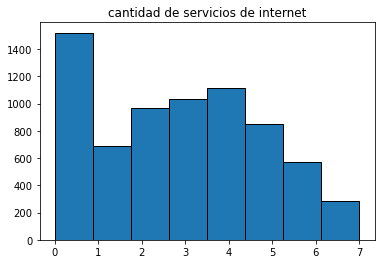

In [33]:
plt.hist(df.serviciodeinternet, bins= 8, edgecolor='black')
plt.title("cantidad de servicios de internet")
plt.show

In [34]:
df["pack"]= df["PhoneService"] + df["InternetService"] # me dice si tiene uno o dos servicios principales (internet/telefono)

In [35]:
pd.crosstab(df.pack, df.serviciodeinternet) # esta tabla es importante porque me resume la matriz de "fidelidad de cliente"

serviciodeinternet,0,1,2,3,4,5,6,7
pack,,,,,,,,
1,1520,80,114,144,152,95,70,25
2,0,609,852,889,965,752,499,258


In [36]:
df["SeniorCitizen"].replace({1: "YES", 0: "NO"}, inplace=True) # la redefino como categórica

ANALISIS UNIVARIADO DEL RESTO DE LAS VARIABLES CATEGORICAS

In [37]:
categoricas_resto = ["gender",
                "SeniorCitizen", 
                "Partner", 
                "Dependents",
                "Contract", 
                "PaperlessBilling", 
                "PaymentMethod"]
df_cate = df[categoricas_resto]

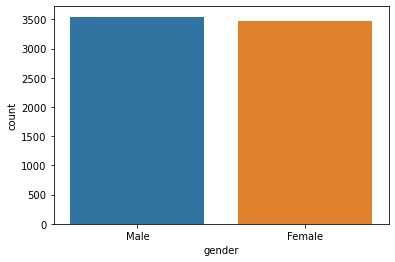

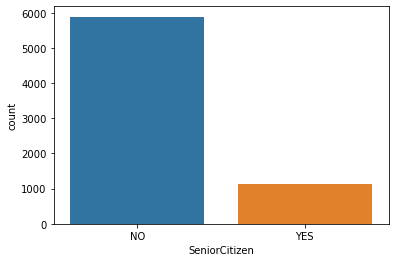

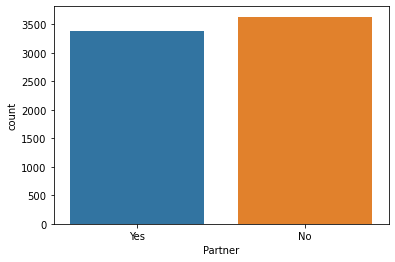

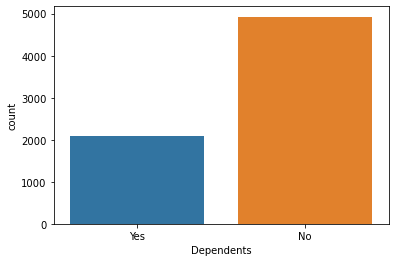

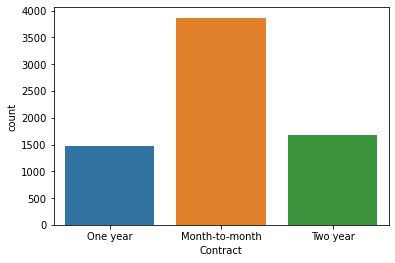

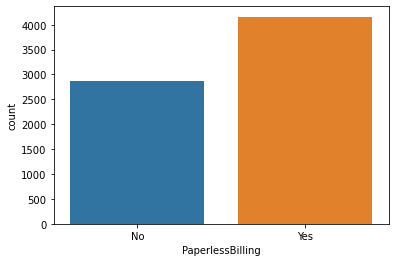

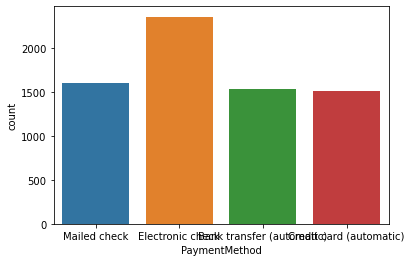

In [38]:
def countplot(df, columns):
    for x in columns:
        snb.countplot(x=x, data=df)
        plt.show()
        
countplot(df, columns=df_cate) # grafico las variables categóricas para ver como estan agrupadas

ANALISIS UNIVARIADO VARIABLES NUMERICAS

In [39]:
numericas= [
          "tenure",
           "MonthlyCharges",
           "TotalCharges",
           "serviciodeinternet",
           "pack"]
df_num= df[numericas]

In [40]:
df_num.describe()

,tenure,MonthlyCharges,TotalCharges,serviciodeinternet,pack
count,7024.000000,7024.000000,7024.000000,7024.000000,7024.000000
mean,32.422124,64.785585,2282.611803,2.821469,1.686788
std,24.539807,30.090981,2265.652526,2.112193,0.463833
min,1.000000,18.250000,0.000000,0.000000,1.000000
25%,9.000000,35.537499,401.762505,1.000000,1.000000
50%,29.000000,70.349998,1397.475037,3.000000,2.000000
75%,55.000000,89.862499,3792.325073,4.000000,2.000000
max,72.000000,118.750000,8684.799805,7.000000,2.000000


5.A VARIABLES NUMERICAS

In [41]:
df["Churn"].value_counts() # esta es nuestra varible objetivo!! nuestra variable a predecir

No     5159
Yes    1865
Name: Churn, dtype: int64

<AxesSubplot:>

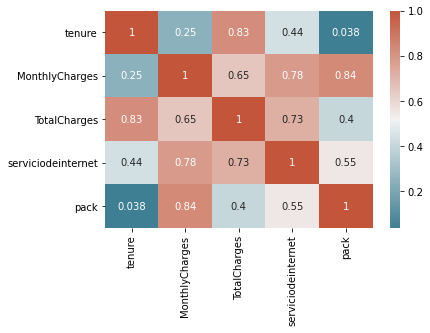

In [42]:
corr = df_num.corr()# plot the heatmap
snb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=snb.diverging_palette(220, 20, as_cmap=True))

# algunas conclusiones que se derivan de la matriz de correlacion (algunas se pueden deducir sin la necesidad de la matriz, pero sirve para corroborar):
-las personas con mayor pago mensual son las que tienen internet y teléfono, y dentro de internet la mayor cantidad de servicios.
-las personas con mayor tiempo en la empresa tienen correlación fuerte positiva con los gastos totales y los gastos mensuales
-los gastos totales es función del tiempo en la empresa y de los gastos mensuales, por lo que podría ser dejada de lado

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

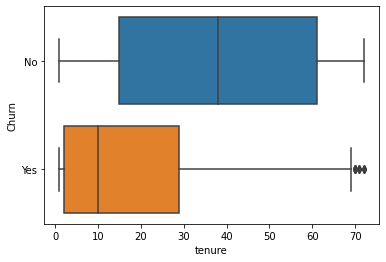

In [43]:
snb.boxplot(x="tenure", y="Churn", data=df) # aca se puede ver que los que dejan tienen un tiempo mucho menor de pertenencia en la empresa

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

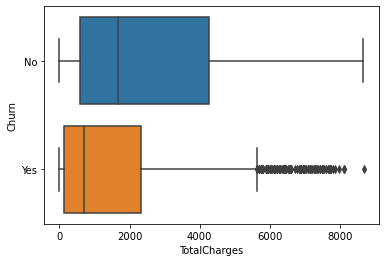

In [44]:
snb.boxplot(x="TotalCharges", y="Churn", data=df) # como el tiempo en la empresa y el cobro total estan correlacionados positivamente, es de esperar este resultado

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

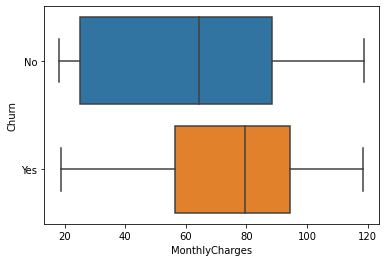

In [45]:
snb.boxplot(x="MonthlyCharges", y="Churn", data=df) # la mediana de los que dejan la empresa es mayor a los que contiuan

<AxesSubplot:xlabel='pack', ylabel='Churn'>

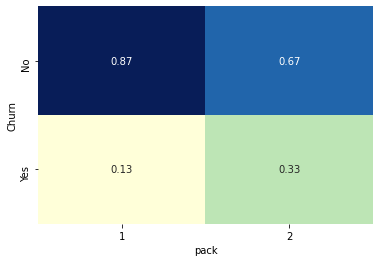

In [46]:
snb.heatmap(pd.crosstab(df.Churn, df.pack, normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False) # en este caso no parece haber una relacion clara entre los que dejan y los principales servicios(telefono, internet)

<AxesSubplot:xlabel='serviciodeinternet', ylabel='Churn'>

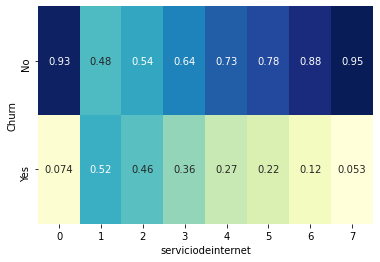

In [47]:
snb.heatmap(pd.crosstab(df.Churn, df.serviciodeinternet, normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False) 
# aca se puede ver una relación interesante, las personas que permanecen tienen los servicios de internet completos, mientas que las que dejaron tienen en su
#mayoría uno o dos servicios

5.B VARIABLES CATEGÓRICAS

1.genero

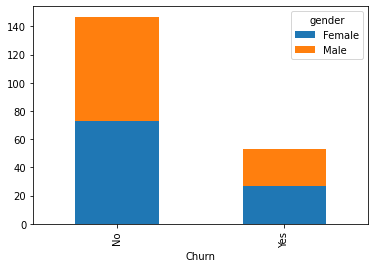

In [48]:
plot = pd.crosstab(index=df['Churn'],
            columns=df['gender']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True) # al parecer la variable género no sería un elemento que influya a la hora de permanecer o no en la empresa

<AxesSubplot:xlabel='MonthlyCharges', ylabel='gender'>

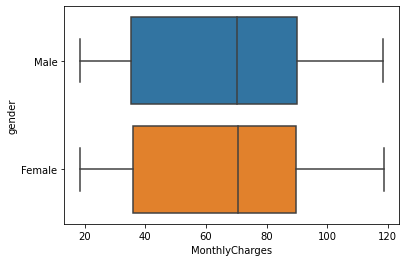

In [49]:
snb.boxplot(x="MonthlyCharges", y="gender", data=df) # tienen una distribución similar en cuanto a gastos mensuales
#por lo anterior la variable género no será tenida en cuenta en el análisis

2. SeniorCitizen

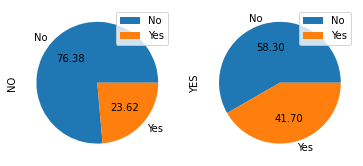

In [50]:
plot = pd.crosstab(index=df['Churn'],
            columns=df['SeniorCitizen']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='pie', stacked=True, subplots=True, autopct='%.2f')

In [51]:
pd.crosstab(df.SeniorCitizen, df.Churn)#proporcionalmente es mayor la gente jubilada que abandona la empresa, este cálculo se refleja en el gráfico de torta anterior

Churn,No,Yes
SeniorCitizen,,
NO,4495,1390
YES,664,475


<AxesSubplot:xlabel='MonthlyCharges', ylabel='SeniorCitizen'>

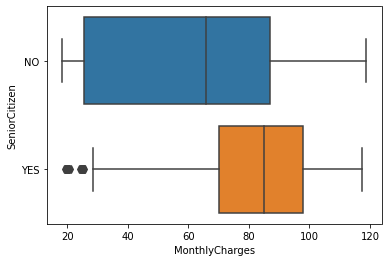

In [52]:
snb.boxplot(x="MonthlyCharges", y="SeniorCitizen", data=df) # los "jubilados" tienen en promedio gastos mensuales mayor a los que no lo son

3.Partner

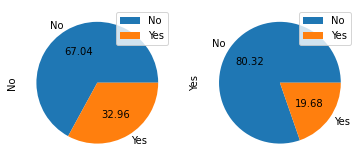

In [53]:
plot = pd.crosstab(index=df['Churn'], #las personas que han dejado la empresa son en proporción mas alta las que no estan en "partner"
            columns=df['Partner']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='pie', stacked=True, subplots=True, autopct='%.2f') 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Partner'>

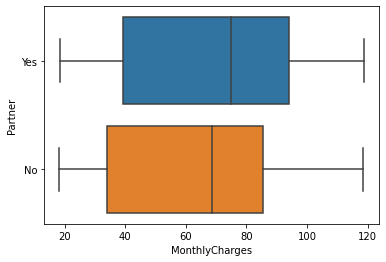

In [54]:
snb.boxplot(x="MonthlyCharges", y="Partner", data=df) # estas personas tienen en promedio un gasto mensual mas elevado

<AxesSubplot:xlabel='serviciodeinternet', ylabel='Partner'>

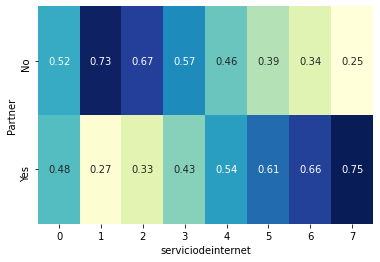

In [55]:
snb.heatmap(pd.crosstab(df.Partner, df.serviciodeinternet, normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False) # este gráfico nos da una idea de que las personas en pareja tiene mayor cantidad de servicios que las que no lo están

4. Dependents

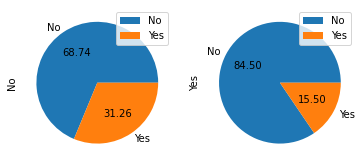

In [56]:
plot = pd.crosstab(index=df['Churn'], #las personas que han dejado la empresa son en proporción mas alta las que no tienen personas a cargo
                   columns=df['Dependents']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='pie', stacked=True, subplots=True, autopct='%.2f') 

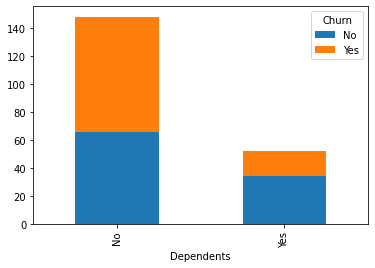

In [57]:
plot = pd.crosstab(index=df["Dependents"],
            columns=df['Churn']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Dependents'>

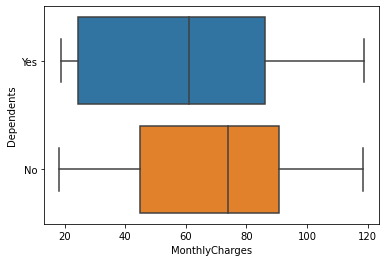

In [58]:
snb.boxplot(x="MonthlyCharges", y="Dependents", data=df) # tiene un gasto proporcionalmente menor los que tienen personas a cargo

4. Contract

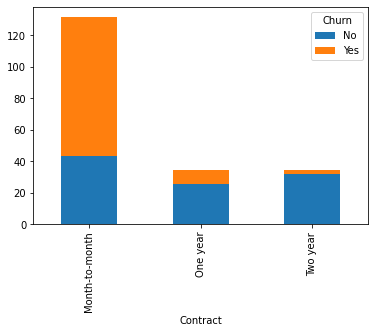

In [59]:
plot = pd.crosstab(index=df['Contract'], # las personas con contratos cortos es más facil que deje la empresa
            columns=df['Churn']      # esta variable es de alta importancia para nuestro caso de análisis a simple vista
                  ).apply(lambda r: r/r.sum() *100, 
                          axis=0).plot(kind='bar', stacked=True)  

5.PaperlessBilling

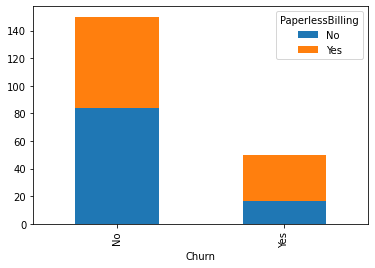

In [60]:
plot = pd.crosstab(index=df['Churn'], 
            columns=df['PaperlessBilling']     
                  ).apply(lambda r: r/r.sum() *100, 
                          axis=0).plot(kind='bar', stacked=True)  

<AxesSubplot:xlabel='serviciodeinternet', ylabel='PaperlessBilling'>

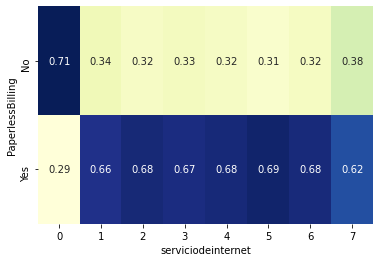

In [61]:
snb.heatmap(pd.crosstab(df.PaperlessBilling, df.serviciodeinternet, normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False) ## las personas con boleta electronica contratan mucho más servicios de internet en cantidad

<AxesSubplot:xlabel='MonthlyCharges', ylabel='PaperlessBilling'>

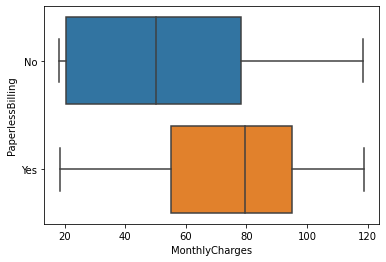

In [62]:
snb.boxplot(x="MonthlyCharges", y="PaperlessBilling", data=df) #proporcionalmente las personas con boleta electrónica tienen un gasto mensual mayor a las que no

6. PatmentMethod

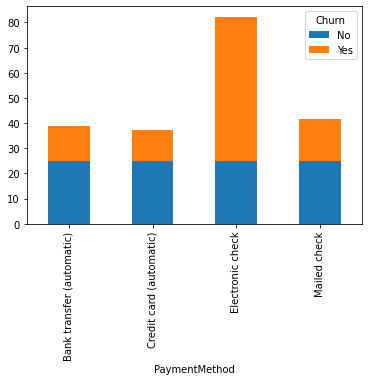

In [63]:
plot = pd.crosstab(index=df['PaymentMethod'],
            columns=df['Churn']
                  ).apply(lambda r: r/r.sum() *100,
            axis=0).plot(kind='bar', stacked=True) # las peronas con metodo de pago electrónico son las que tienen menor propabilidad de dejar la empresa


6. SELECCION DE COLUMNAS RELEVANTES PARA EL CASO DE ANALISIS, en base a lo analizado previamente

In [64]:
seleccion= ["customerID",
            "SeniorCitizen",
            "Partner", 
            "Dependents",
            "Contract",
            "PaymentMethod",
            "tenure",
            "PaperlessBilling",
            "MonthlyCharges",
           "serviciodeinternet",
           "pack"
           ]
df_seleccion= df[seleccion]

In [65]:
df_seleccion.head()

,customerID,SeniorCitizen,Partner,Dependents,Contract,PaymentMethod,tenure,PaperlessBilling,MonthlyCharges,serviciodeinternet,pack
11,2967-MXRAV,NO,Yes,Yes,One year,Mailed check,1.0,No,18.799999,0,1
12,9318-NKNFC,NO,No,No,Month-to-month,Mailed check,1.0,Yes,18.850000,0,1
13,8992-CEUEN,NO,No,No,Month-to-month,Electronic check,1.0,No,18.850000,0,1
14,9975-SKRNR,NO,No,No,Month-to-month,Mailed check,1.0,No,18.900000,0,1
15,1423-BMPBQ,NO,Yes,Yes,Month-to-month,Mailed check,1.0,Yes,19.000000,0,1


In [66]:
df_seleccion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7024 entries, 11 to 7042
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7024 non-null   object 
 1   SeniorCitizen       7024 non-null   object 
 2   Partner             7024 non-null   object 
 3   Dependents          7024 non-null   object 
 4   Contract            7024 non-null   object 
 5   PaymentMethod       7024 non-null   object 
 6   tenure              7024 non-null   float64
 7   PaperlessBilling    7024 non-null   object 
 8   MonthlyCharges      7024 non-null   float64
 9   serviciodeinternet  7024 non-null   int64  
 10  pack                7024 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 916.5+ KB
